In [398]:
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt

In [399]:
import seaborn as sns

In [400]:
data_train=pd.read_csv("train.csv")

In [401]:
data_test=pd.read_csv("test.csv")

In [402]:
data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [257]:
#data_test.head()

In [258]:
corr=data_train.corr()

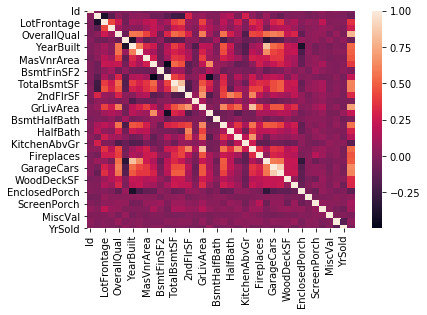

In [259]:
sns.heatmap(corr)

In [260]:
data_train.drop("Id",axis=1,inplace=True)

In [261]:
data_test.drop("Id",axis=1,inplace=True)

In [262]:
data_train.shape ,data_test.shape

((1460, 80), (1459, 79))

In [263]:
#train_data=data_train.values
#test_data=data_test.values

In [264]:
#train_data.shape,test_data.shape

In [265]:
categorical=data_train.select_dtypes(["object"]).columns

In [266]:
numerical=data_train.select_dtypes(["float64","int64"]).columns

In [267]:
corr=data_train.corr()

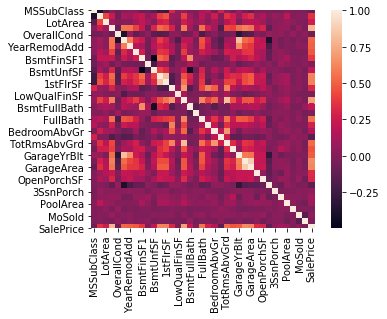

In [268]:
sns.heatmap(corr,square=True)
#sns.heatmap(corr,square=True,cmap=plt.cm.Blues)

In [269]:
indx=corr.nlargest(10,"SalePrice").index             
#indx=corr.nlargest(10,"SalePrice")["SalePrice"].index             ### sir 

In [270]:
corr1=data_train[numerical][indx].corr()

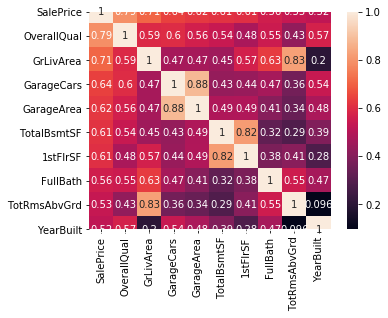

In [271]:
sns.heatmap(corr1,square=True,annot=True)
plt.show()

In [272]:
indx[1:]

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
       '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

In [273]:
feature="OverallQual"

In [274]:
df=pd.concat([data_train["SalePrice"],data_train[feature]],axis=1)

In [275]:
df.head()

,SalePrice,OverallQual
0,208500,7
1,181500,6
2,223500,7
3,140000,7
4,250000,8


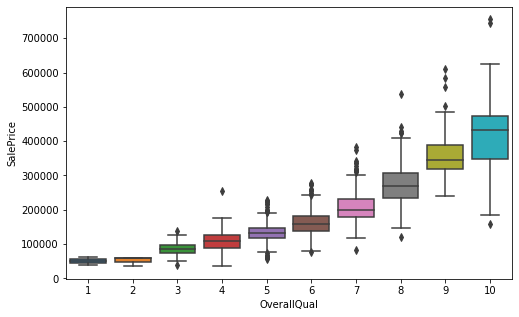

In [276]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df,x="OverallQual",y="SalePrice") 
plt.show()

In [277]:
data_train["GrLivArea"].describe()

count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64

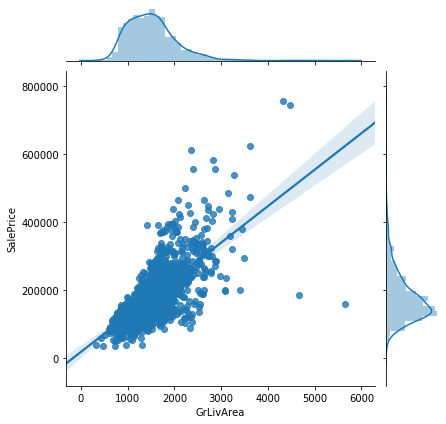

In [278]:
sns.jointplot(x=data_train["GrLivArea"],y=data_train["SalePrice"],kind="reg")
plt.show()

In [279]:
ind=data_train[(data_train["SalePrice"]<200000) & (data_train["GrLivArea"]>4300)].index

In [280]:
ind

Int64Index([523, 1298], dtype='int64')

In [281]:
data_train=data_train.drop(ind)

In [282]:
data_train=data_train.reset_index(drop=True)

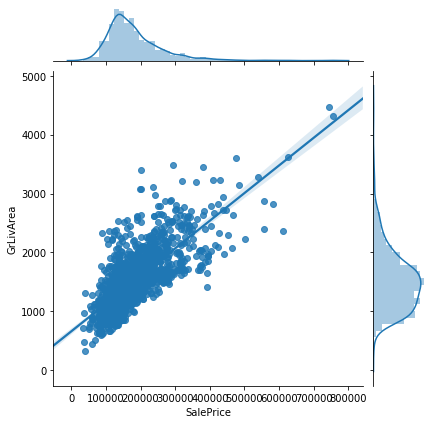

In [283]:
sns.jointplot(x=data_train["SalePrice"],y=data_train["GrLivArea"],kind="reg")

In [284]:
indx[1:]

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
       '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

In [285]:
data_train["GarageArea"].describe()

count    1458.000000
mean      472.050069
std       212.239248
min         0.000000
25%       331.500000
50%       479.500000
75%       576.000000
max      1390.000000
Name: GarageArea, dtype: float64

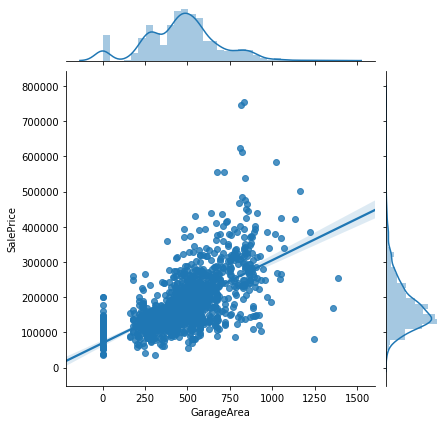

In [286]:
sns.jointplot(x=data_train["GarageArea"],y=data_train["SalePrice"],kind="reg")

In [287]:
inx=data_train[(data_train["GarageArea"]>=1200)&(data_train["SalePrice"]<300000)].index

In [288]:
inx

Int64Index([580, 1060, 1189], dtype='int64')

In [289]:
data_train=data_train.drop(inx)

In [290]:
data_train=data_train.reset_index(drop=True)

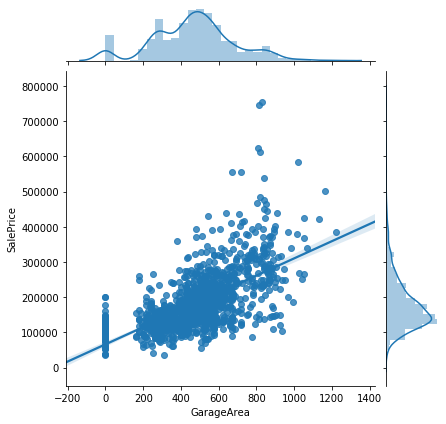

In [291]:
sns.jointplot(x=data_train["GarageArea"],y=data_train["SalePrice"],kind="reg")

In [292]:
data_train["GarageCars"].describe()

count    1455.000000
mean        1.762887
std         0.744164
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: GarageCars, dtype: float64

In [293]:
data_train["GarageCars"].unique()

array([2, 3, 1, 0, 4], dtype=int64)

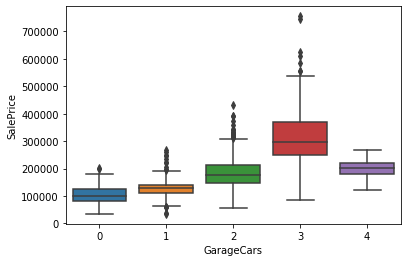

In [294]:
sns.boxplot(x=data_train["GarageCars"],y=data_train["SalePrice"])
plt.show()

In [295]:
inx=data_train[(data_train["GarageCars"]>3) & (data_train["SalePrice"]<300000)].index

In [296]:
inx

Int64Index([420, 745, 1335, 1345], dtype='int64')

In [297]:
data_train=data_train.drop(inx)

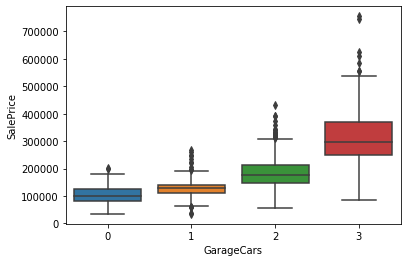

In [298]:
sns.boxplot(x=data_train["GarageCars"],y=data_train["SalePrice"])

In [299]:
data_train.isnull().head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False


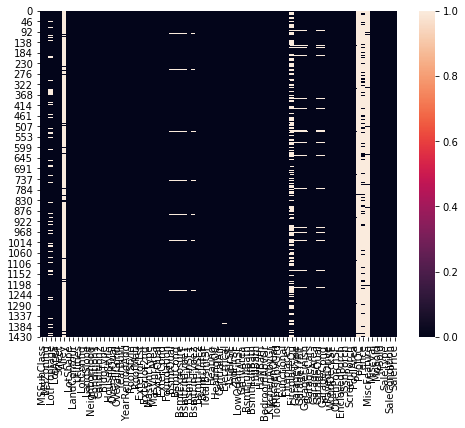

In [300]:
plt.figure(figsize=(8,6))
sns.heatmap(data_train.isnull(),xticklabels=data_train.columns)
plt.show()

In [385]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1451 entries, 0 to 1450
Data columns (total 81 columns):
level_0          1451 non-null int64
index            1451 non-null int64
MSSubClass       1451 non-null int64
MSZoning         1451 non-null object
LotFrontage      1451 non-null float64
LotArea          1451 non-null int64
Street           1451 non-null object
Alley            1451 non-null object
LotShape         1451 non-null object
LandContour      1451 non-null object
Utilities        1451 non-null object
LotConfig        1451 non-null object
LandSlope        1451 non-null object
Neighborhood     1451 non-null object
Condition1       1451 non-null object
Condition2       1451 non-null object
BldgType         1451 non-null object
HouseStyle       1451 non-null object
OverallQual      1451 non-null int64
OverallCond      1451 non-null int64
YearBuilt        1451 non-null int64
YearRemodAdd     1451 non-null int64
RoofStyle        1451 non-null object
RoofMatl         1451 non-

In [302]:
data_train["Alley"].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [386]:
data_train.columns

Index(['level_0', 'index', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea',
       'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive

In [303]:
data_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


No alley access

In [304]:
data_train["Alley"]=data_train["Alley"].replace(0,np.NaN)

In [305]:
data_train["Alley"].fillna("No alley access",inplace=True)

In [306]:
#data_train["LotFrontage"].unique()

In [307]:
data_train["LotFrontage"].head()

0    65.0
1    80.0
2    68.0
3    60.0
4    84.0
Name: LotFrontage, dtype: float64

In [308]:
data_train["LotFrontage"].fillna(data_train["LotFrontage"].mean(),inplace=True)

In [309]:
data_train["MasVnrType"].unique()
#data_train["LotFrontage"].unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

In [310]:
data_train["MasVnrType"].fillna('Stone',inplace=True)

In [311]:
data_train["PoolQC"].unique()

array([nan, 'Ex', 'Fa', 'Gd'], dtype=object)

In [312]:
data_train["PoolQC"].fillna("no pool",inplace=True)

In [313]:
data_train["FireplaceQu"].unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [314]:
data_train["GarageType"].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

In [315]:
data_train["GarageYrBlt"].unique()

array([2003., 1976., 2001., 1998., 2000., 1993., 2004., 1973., 1931.,
       1939., 1965., 2005., 1962., 2006., 1960., 1991., 1970., 1967.,
       1958., 1930., 2002., 1968., 2007., 2008., 1957., 1920., 1966.,
       1959., 1995., 1954., 1953.,   nan, 1983., 1977., 1997., 1985.,
       1963., 1981., 1964., 1999., 1935., 1990., 1945., 1987., 1989.,
       1915., 1956., 1948., 1974., 2009., 1950., 1961., 1921., 1900.,
       1979., 1951., 1969., 1936., 1975., 1971., 1923., 1984., 1926.,
       1955., 1986., 1988., 1916., 1932., 1972., 1918., 1980., 1924.,
       1996., 1940., 1949., 1994., 1910., 1978., 1982., 1992., 1925.,
       1941., 2010., 1927., 1947., 1937., 1942., 1938., 1952., 1928.,
       1922., 1934., 1906., 1914., 1946., 1908., 1929., 1933.])

In [316]:
data_train["GarageYrBlt"].fillna(data_train["GarageYrBlt"].mean(),inplace=True)

In [317]:
data_train["GarageType"].fillna("no garage",inplace=True)

In [318]:
data_train["FireplaceQu"].fillna("no fireplace",inplace=True)

In [ ]:
"BsmtQual","FireplaceQu","GarageType","GarageYrBlt","PoolQC"

In [319]:
data_train["BsmtQual"].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [353]:
data_train.loc[29].unique()

array([29, 30, 'RM', 60.0, 6324, 'Pave', 'No alley access', 'IR1', 'Lvl',
       'AllPub', 'Inside', 'Gtl', 'BrkSide', 'Feedr', 'RRNn', '1Fam',
       '1Story', 4, 6, 1927, 1950, 'Gable', 'CompShg', 'MetalSd', 'None',
       0.0, 'TA', 'BrkTil', 'No', 'Unf', 520, 'GasA', 'Fa', 'N', 'SBrkr',
       1, 'Typ', 'no fireplace', 'Detchd', 1920.0, 240, 'Y', 49, 87,
       'no pool', nan, 5, 2008, 'WD', 'Normal', 68500], dtype=object)

In [383]:
data_train["MiscVal"].unique()

array([    0,   700,   350,   500,   400,   480,   450, 15500,  1200,
         800,  2000,   600,  3500,  1300,    54,   620,  1400,  8300,
        1150,  2500], dtype=int64)

In [350]:
data_train.replace("-",None,inplace=True)

index            None
MSSubClass       None
MSZoning         None
LotFrontage      None
LotArea          None
                 ... 
MoSold           None
YrSold           None
SaleType         None
SaleCondition    None
SalePrice        None
Length: 81, dtype: object

In [356]:
data_train.drop("MasVnrType",axis=1,inplace=True)

In [351]:
#data_train=data_train.mask(data_train["MasVnrType"].eq("None")).dropna()

In [389]:
data_train["MiscVal"].unique()x1=data_train[['index', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea','SaleType', 'SaleCondition','BsmtQual','FireplaceQu','GarageType','GarageYrBlt','PoolQC']]

SyntaxError: invalid syntax (<ipython-input-389-a45d2c258b41>, line 1)

In [393]:
x1=data_train[['index', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea','SaleType', 'SaleCondition','FireplaceQu','GarageType','GarageYrBlt','PoolQC']]

In [352]:
#df.mask(df.astype(object).eq('None')).dropna()

In [346]:
#data_train.shape

In [403]:
X=data_train.iloc[:,:79].values

In [358]:
data_train.reset_index(inplace=True)

In [404]:
X.shape

(1460, 79)

In [405]:
y=data_train.iloc[:,79:].values

In [406]:
X=pd.DataFrame(X)

In [407]:
y=pd.DataFrame(y)

In [372]:
y.drop(0,axis=1,inplace=True)

In [408]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder

In [409]:
melbourne_model = DecisionTreeRegressor(random_state=1)

In [410]:
le=LabelEncoder()

In [411]:
X=pd.DataFrame(x1)

In [412]:
X.apply(le.fit_transform)

,index,MSSubClass,MSZoning,LotFrontage,LotArea,SaleType,SaleCondition,FireplaceQu,GarageType,GarageYrBlt,PoolQC
0,0,5,3,36,325,8,4,5,1,90,3
1,1,0,3,52,496,8,4,4,1,62,3
2,2,5,3,39,700,8,4,4,1,88,3
3,3,6,3,31,487,8,0,2,5,85,3
4,4,5,3,56,921,8,4,4,1,87,3
...,...,...,...,...,...,...,...,...,...,...,...
1446,1446,5,3,33,266,8,4,4,1,86,3
1447,1447,0,3,57,862,8,4,4,1,64,3
1448,1448,6,3,37,413,8,4,2,1,29,3
1449,1449,0,3,39,503,8,4,5,1,36,3


In [413]:
melbourne_model.fit(X,y)

ValueError: could not convert string to float: 'RL'